# Report 4

## Introduction

The night sky is filled with a myriad of stars. One can lookup and see a number of them. Perhaps there may be a method to order all of the stars in a patch of sky in order of brightness. The objective of this project is to make a table consisting of 50-60 of the brightest stars in our patch of sky. In the process of doing so, a database will be created that establishes a map of "Betsy" points from each triple of objects back to each triple of names in the database. 

My plan to do this includes defining the function bpt to calculate each vector, a, b, and c, then calculate the length of the vectors. I will use x' = (b^2+c^2-a^2)/(2*c) and y' = sqrt(b^2 + x^2) to map bpts to triples of IDs. I will "take a photo" then utilize the bpt mappings to locate the stars by x' and y'.

The Betsy point is best descriped as a point determined from the canonical representation of a triangle. It converts the a,b,c vectors into x' and y' points. This will be attached to a mapping of the identities of the three stars that constitute the points of the triangle.

# Code

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'  # linux only
%matplotlib inline
import requests
from io import StringIO
import pandas as pd

My database did not return more than 18 objects originally, so I decided to increase the parameters through which we looked at known stars in order to return more than 50 objects.

In [2]:
# get my stars

q = '''SELECT TOP 100000
   p.objid,p.ra,p.dec,p.u,p.g,p.r,p.i,p.z,
   s.specobjid, s.class, s.z as redshift
FROM PhotoObj AS p
   JOIN SpecObj AS s ON s.bestobjid = p.objid
WHERE 
   p.ra between 23 and 23.05 and
   p.dec between 0 and 1
'''
url = 'http://skyserver.sdss.org/dr14/SkyServerWS/SearchTools/SqlSearch?cmd={}&format=csv'.format(q.replace(' ','%20'))
r = requests.get(url)
if r.status_code==200:
    csv = StringIO(r.text)
    df = pd.read_csv(csv,skiprows=1)
    display(df.tail())
else:
    print('Unsuccessful :-(')

,objid,ra,dec,u,g,r,i,z,specobjid,class,redshift
53,1237657071694054353,23.034752,0.744654,19.81097,18.92064,18.50072,18.51951,18.11252,1691201228643526656,GALAXY,0.057096
54,1237663785281192253,23.036050,0.988649,21.04594,20.29948,19.54056,19.30025,19.13364,1213827346302265344,GALAXY,0.332743
55,1237663784207450283,23.018093,0.103580,19.54102,17.59023,16.72138,16.57721,16.43841,1215021415560931328,STAR,-0.000016
56,1237657071157182791,23.023789,0.211916,21.14281,20.44086,19.76147,19.52522,19.12745,1215021690438838272,QSO,0.351013
57,1237657071694053693,23.012233,0.793666,19.31738,19.27436,19.29519,18.98370,19.03153,450464171998341120,QSO,1.807962


57


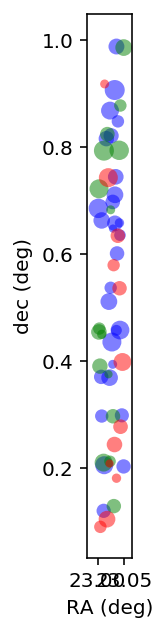

In [70]:
df['brightness'] = (df['g'].max()-df['g'])/(df['g'].max()-df['g'].min())  #makes dimmest=0 and brightest=1
dfb = df[ df['brightness']>0 ].copy()  # select just the brightest objects
print(len(dfb))
decref = 10.5  # representative declination for my patch
plt.figure(figsize=(5,5))
plt.subplot(111,aspect=1/np.cos(decref*np.pi/180))
for kind,color in zip(['GALAXY','QSO','STAR'],'bgr'):
    dfx = dfb[ dfb['class']==kind ]
    plt.scatter( dfx['ra'], dfx['dec'],c=color, s=100*df['brightness'], alpha=0.5, linewidth=0 )
plt.xlabel('RA (deg)')
plt.ylabel('dec (deg)')

#Do the projection on to the tangent plane
dec0 = 10.75  # representative declination for the patch
dfb['x'] = dfb['ra']/np.cos(dec0*np.pi/180)
dfb['y'] = dfb['dec']

In [71]:
# get some random nicknames to use instead of the unfriendly objids

# idea 1: use names of actual (other) stars
starnamelist = pd.read_html(requests.get('https://en.wikipedia.org/wiki/List_of_proper_names_of_stars').text)[0]['Modern proper name'].values
dfb['nickname']= starnamelist[np.random.choice(list(range(len(starnamelist))),len(dfb),replace=False)]

In [72]:
dfb = dfb[[dfb.columns[-1]]+(list(dfb.columns[:-1]))]
dfb

,nickname,objid,ra,dec,u,g,r,i,z,specobjid,class,redshift,brightness,x,y
0,Alya,1237663784744321133,23.027392,0.435309,20.25224,18.16768,16.99178,16.52042,16.17781,450487811498338304,GALAXY,0.145009,0.902051,23.438733,0.435309
1,Errai,1237663785281192156,23.023823,0.868658,20.25349,18.87486,17.93846,17.49489,17.12978,1691209474980734976,GALAXY,0.134327,0.802705,23.435100,0.868658
2,Rasalas,1237657071694053811,23.002871,0.722185,22.06207,21.82627,21.58367,21.40033,21.22410,8849631384563589120,QSO,0.829576,0.388086,23.413774,0.722185
3,Zaurak,1237663785281192185,23.038836,0.848502,24.50728,20.84059,19.18777,18.50499,18.14144,4761694681120612352,GALAXY,0.419923,0.526556,23.450380,0.848502
4,Bharani,1237663784744321375,23.037210,0.601150,23.16252,20.76917,19.09508,18.47461,18.07633,4761696330388054016,GALAXY,0.344872,0.536589,23.448726,0.601150
5,Rasalhague,1237657071157183551,23.011576,0.209501,22.96792,23.38032,22.28279,22.55446,22.17785,9899052841997148160,QSO,1.537901,0.169771,23.422634,0.209501
6,Torcular,1237657071694054668,23.029005,0.697608,25.60103,23.03071,21.64005,20.26975,19.61801,8835101338503192576,GALAXY,0.654421,0.218884,23.440375,0.697608
7,Vindemiatrix,1237657071694053477,23.029502,0.647760,24.24970,21.86405,20.40530,20.06741,19.82314,784901531118888960,GALAXY,0.287131,0.382779,23.440880,0.647760
8,Dalim,1237657071694053759,23.020637,0.743144,24.68483,20.86685,19.47896,18.37706,17.81574,1213824872401102848,STAR,0.000083,0.522867,23.431857,0.743144
9,Gacrux,1237657071694054378,23.041806,0.658335,25.39364,23.15705,22.61830,22.61067,22.32880,9898038542671519744,GALAXY,1.033352,0.201136,23.453404,0.658335


In [73]:
def take_photo(starprojection_in):

    def random(lo,hi):
        return lo + (hi-lo)*np.random.rand()
   
    starprojection = starprojection_in.copy()
    starprojection['brightness'] -= starprojection['brightness'].min()
    starprojection['brightness'] += .1
    starprojection['brightness'] /= starprojection['brightness'].max()
   
    sp = starprojection[['x','y']].values
    plt.figure(figsize=(12,4))
    plt.subplot(131,aspect=1,facecolor='#404040')
    #plt.plot(sp[:,0],sp[:,1],'o',color='#ffddff',markersize=1,alpha=0.7)
    plt.scatter(sp[:,0],sp[:,1],c='#ffddff', s=10*starprojection['brightness'], alpha=0.75, linewidth=0 )
    plt.title('original projection')

    sp -= sp.min(axis=0)
    sp /= sp.max()
    # data now lies in unit square
   
    theta = 2*np.pi*np.random.rand()  # choose a rotation angle
    c,s = np.cos(theta),np.sin(theta)
    rotation = np.array([[c,-s],[s,c]])
    rsp = (np.dot(rotation,sp.T)).T
    # scale to unit square again
    rsp -= rsp.min(axis=0)
    rsp /= rsp.max()
       
    w = random(.2,.6)
    xlo = random(0,1-w)
    xhi = xlo + w
    h = random(.15,.5)
    ylo = random(0,1-h)
    yhi = ylo + h
    plt.subplot(132,aspect=1,facecolor='#404040')
    plt.plot(rsp[:,0],rsp[:,1],'o',color='#ffddff',markersize=1,alpha=0.7)
    plt.scatter(rsp[:,0],rsp[:,1],c='#ffddff', s=10*starprojection['brightness'], alpha=0.75, linewidth=0 )
    box = np.array([[xlo,xhi,xhi,xlo,xlo],[ylo,ylo,yhi,yhi,ylo]])
    plt.plot(*box,'#40a0a0',alpha=0.5)
    plt.title('rotated view from camera')
   
    starprojection['xprime'] = rsp[:,0]
    starprojection['yprime'] = rsp[:,1]
   
    photo = starprojection[ (starprojection['xprime']>=xlo) & \
                            (starprojection['xprime']<=xhi) & \
                            (starprojection['yprime']>=ylo) & \
                            (starprojection['yprime']<=yhi) ]
    #ibox = np.dot(np.linalg.inv(rotation),box)
    plt.subplot(133,aspect=1,facecolor='#404040')
    #plt.plot(photo['xprime'],photo['yprime'],'o',color='#ffddff',markersize=2,alpha=0.7)
    plt.scatter(photo['xprime'],photo['yprime'],c='#ffddff', s=100*starprojection['brightness'], alpha=0.75, linewidth=0 )
    plt.xlim(xlo,xhi)
    plt.ylim(ylo,yhi)
    plt.xticks([])
    plt.yticks([])
    plt.title('the photo')
    #plt.axis('off')
    photo = photo.rename(columns={'nickname':'nickname for checking answers','brightness':'brightness for plotting only'})
    return photo[['xprime','yprime','nickname for checking answers','brightness for plotting only']].reset_index(drop=True)#,'brightness']]

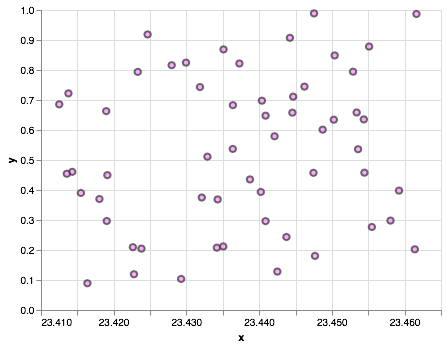

In [74]:
import altair as alt
alt.renderers.enable('notebook')
x = alt.X('x',scale=alt.Scale(zero=False))
y = alt.Y('y',scale=alt.Scale(zero=False))
alt.Chart(dfb).mark_point(size=40,fill='#ff88ff',stroke='#303030').encode(x=x,y=y,tooltip='nickname')
# Incredibly, there is currently no easy way in Altair to force the x and y scales (units per cm) to be the same


In [75]:
import requests
from io import StringIO
import pandas as pd
sheets = {'student_sky_patches_f19.csv'  :'1Gmft0CQTG_fxwDJWT6TgFm77GVXb0M3i3gjheTzXh8w'} 

import requests
for sheet in sheets:
        url = 'https://docs.google.com/spreadsheets/d/' + sheets[sheet] + '/export?format=csv'
        r = requests.get(url)
        if r.status_code == 200: # success
            #with open(sheet,'wb') as f:
            #    f.write(r.content)
            patches = pd.read_csv( StringIO(r.text) )
            print('Downloaded '+sheet)
            display(patches)
        else:
            print('Failed to get '+sheet)

Downloaded student_sky_patches_f19.csv


,UBIT username,First name,RA min (h),RA max (h),RA min (deg),RA max (deg),Dec min (deg),Dec max (deg),constellation,patch square degrees,patches to fill the sky,star count,stars per sq. deg.,galaxy count in patch,extrap galaxy count to whole sky
0,gifariho,Gifari,4:12:00 AM,4:18:00 AM,63.000,64.50000,14.00,15.90000,Taurus,2.89,14274.0,313.0,108.0,41.0,585234
1,chimaobi,Chima,22:00:00,22:20:00,330.000,333.00000,2.00,7.00000,Andromeda,4.25,9695.0,1201.0,283.0,2092.0,NaN
2,darshkir,Darsh,8:30:00,8:35:40,127.500,128.91420,45.00,46.00000,LYNX,1.00,41253.0,99.0,99.0,500.0,681
3,jacobalm,Jacob,17:12:00,17:18:00,258.000,259.50000,13.00,15.00000,Hercules,4.00,16200.0,13.0,3.0,61.0,988200
4,chenranj,Chenran,22:00:00,22:20:00,330.000,333.00000,2.00,7.00000,Andromeda,4.25,9695.0,1201.0,283.0,2092.0,NaN
5,zoeherri,Zoe,9:40.00,9:47.01,145.000,146.77052,40.00,41.34287,Near Lynx,1.80,22876.0,75.0,42.0,416.0,516416
6,lli75,Li,8:50,8:58,132.500,134.50000,8.00,10.00000,cancer,4.00,10313.0,504.0,126.0,806.0,8312472
7,palakkal,Palak,8:50,8:58,132.500,134.50000,8.00,8.00000,cancer,4.00,10314.0,NaN,NaN,NaN,NaN
8,junyulon,junyu,12:32,12:36,188.000,189.00000,27.00,28.50000,canes venatici,1.50,27502.0,NaN,NaN,NaN,NaN
9,dmitriki,dmitri,8:30:00,8:34:00,127.500,128.50000,45.00,46.41420,LYNX,1.00,41253.0,22147.0,22147.0,NaN,NaN


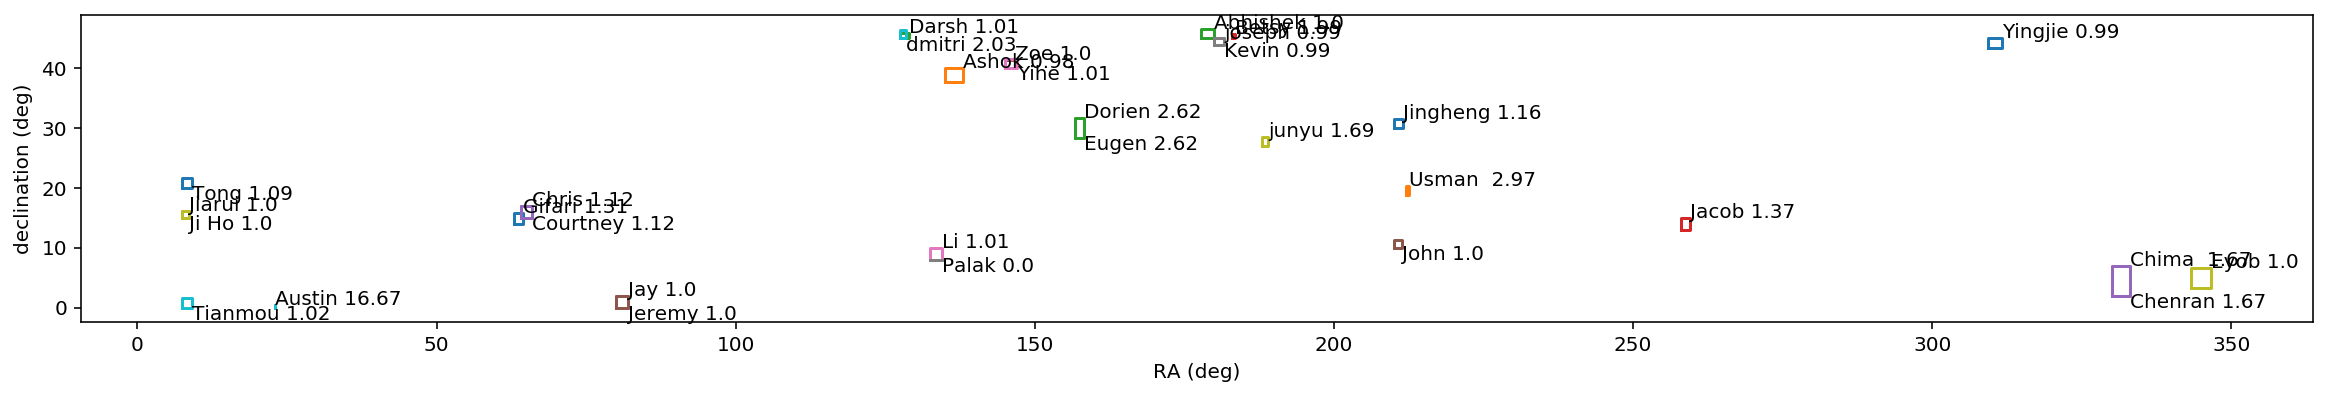

In [76]:
patches.columns
goodpatches = patches[['First name','RA min (deg)', 'RA max (deg)', 'Dec min (deg)', 'Dec max (deg)']].copy()
goodpatches.dropna(inplace=True)
plt.figure(figsize=(20,10))
plt.subplot(111,aspect=1)
seen = set([])
for i,(first,ramin,ramax,decmin,decmax) in goodpatches.iterrows():
#       'constellation', 'patch square degrees', 'patches to fill the sky',
#       'star count', 'stars per sq. deg.', 'galaxy count in patch',]] 
    #print(first)
    try:
        rectx = [ramin,ramax,ramax,ramin,ramin]
        recty = [decmin,decmin,decmax,decmax,decmin]
        #print(rectx)
        #print(recty)
        aspect = (decmax-decmin)/(ramax-ramin)/np.cos( np.mean([decmin,decmax])*np.pi/180 )
        #print(aspect)
        plt.plot(rectx,recty)
        if ramin in seen:
            y = np.min(recty) - 2
        else:
            y = np.max(recty)
            seen.add(ramin)
        plt.text(np.max(rectx),y,first + ' ' + str(np.round(aspect,2)),fontsize=10)
        #print(first,'ok',ramin,ramax,decmin,decmax)
    except Exception as e: 
        print(e)
        print(first,'has a problem')
        #break
plt.xlabel('RA (deg)');
plt.ylabel('declination (deg)');

In [77]:
nstars = 5
stars = np.random.rand(2,nstars)
stars

array([[0.43799996, 0.90163936, 0.09192217, 0.34791384, 0.26813978],
       [0.23926573, 0.01874427, 0.36001141, 0.02874842, 0.95428908]])

In [78]:
t = list(zip(dfb['x'][:3], dfb['y'][:3]))
t

[(23.43873268532647, 0.435308570178409),
 (23.43509957889111, 0.868658265596498),
 (23.413773507385816, 0.722185265442004)]

In [79]:
IDs = list(dfb['objid'][:3])
IDs

[1237663784744321133, 1237663785281192156, 1237657071694053811]

**Goal:** From the xprime,yprime columns of the "photo" only, recover the nicknames of the objects in the photo.

In [80]:
from math import *

In [81]:
def compute_length(bpt):
    lengths = []
    for pair in bpt:
        lengths.append(sqrt(pair[0]**2+pair[1]**2))
    return lengths

In [169]:
def bpt(t):
    # compute the "Betsy point" (the 3rd vertex of the canonical presentation) of this triple
    # x = (b^2+c^2-a^2)/2c
    # y = +sqrt(b^2-x^2)
    # a = 2nd longest
    # b = shortest side
    # c = hypotenuse
    vertices = []
    vertices.append((t[0][0] - t[1][0], t[0][1] - t[1][1]))
    vertices.append((t[1][0] - t[2][0], t[1][1] - t[2][1]))
    vertices.append((t[0][0] - t[2][0], t[0][1] - t[2][1]))
    
    lengths = list(map(lambda x : x/max(sorted(compute_length(vertices))),sorted(compute_length(vertices))))
    
    x = (lengths[0]**2+lengths[2]**2-lengths[1]**2)/(2*lengths[2])
    y = sqrt(lengths[0]**2+x**2)
    return x,y

In [170]:
bpt(t)

(0.2562173315151006, 0.3674790977126308)

In [184]:
import scipy
tree = scipy.spatial.KDTree(bpt(t), leafsize = 10)

ValueError: not enough values to unpack (expected 2, got 1)

In [192]:
pts = []
last = 0
for x in range(3, len(dfb['objid']), 3):
    #for y in range(x+1, len(dfb['objid'])):
        #for z in range(y+1, len(dfb['objid'])):
        try:
            t = list(zip(dfb['x'][last:x], dfb['y'][last:x]))
            IDs = list(dfb['objid'][last:x])
            #t = [[dfb['x'][x], dfb['x'][y], dfb['x'][z]],[(dfb['y'][x], dfb['y'][y], dfb['y'][z])]]
            #IDs = [dfb['objid'][x], dfb['objid'][y], dfb['objid'][z]]
            pts.append((bpt(t),IDs))
            last = x
        except IndexError:
            continue
        except KeyError:
            continue

Following are the Betsy points and the corresponding Identities

In [200]:
pts

[((0.33756554291550456, 0.480218059717162),
  [1237663784744321133, 1237663785281192156, 1237657071694053811]),
 ((0.3864747482331136, 0.5467420662177714),
  [1237663785281192185, 1237663784744321375, 1237657071157183551]),
 ((0.4815313293699963, 0.6823917412465269),
  [1237657071694054668, 1237657071694053477, 1237657071694053759]),
 ((0.46465196566611194, 0.6614733175143331),
  [1237657071694054378, 1237657071157182737, 1237663784744321900]),
 ((0.125716081022421, 0.18276037522175584),
  [1237657071157182541, 1237663785281192110, 1237657071157183296]),
 ((0.38889969444239336, 0.5501709867561497),
  [1237663784207450265, 1237657071694053839, 1237657071157182790]),
 ((0.16783957306420033, 0.23736945765913772),
  [1237657071157183288, 1237657071694053467, 1237657071694054347]),
 ((0.3569096345601493, 0.5058619825117344),
  [1237657071694054225, 1237657071694053726, 1237663784744321841]),
 ((0.0030870373801075157, 0.012302606343948608),
  [1237657071694053472, 1237657071694053485, 123765

,xprime,yprime,nickname for checking answers,brightness for plotting only


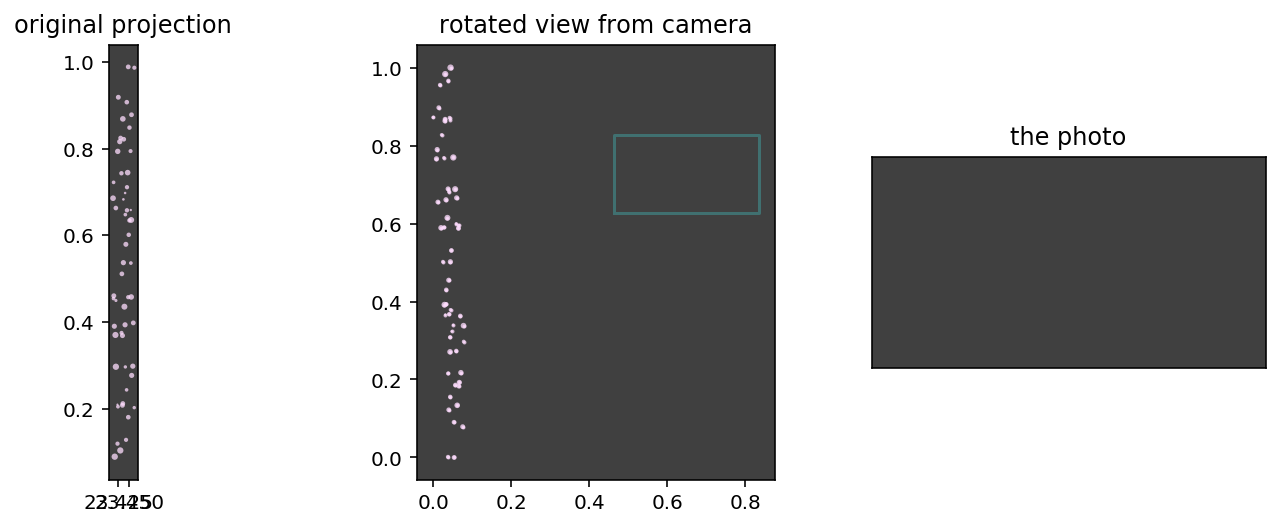

In [194]:
take_photo(dfb)

I could not create a function to retrieve the nicknames from the database from the photo alone due to the fact that the primes and my Betsy points were not equivalent.

In [195]:
dfb.loc[dfb['nickname'] == 'Bharani']

,nickname,objid,ra,dec,u,g,r,i,z,specobjid,class,redshift,brightness,x,y
4,Bharani,1237663784744321375,23.03721,0.60115,23.16252,20.76917,19.09508,18.47461,18.07633,4761696330388054016,GALAXY,0.344872,0.536589,23.448726,0.60115


The second nickname listed was Bharani which is included in the second mappings IDs. I checked to see if Rasalas was in the first IDs from mapping, which it was. This leads me to think that I have made an error in my calculations

In [196]:
dfb.loc[dfb['nickname'] == 'Wazn']

,nickname,objid,ra,dec,u,g,r,i,z,specobjid,class,redshift,brightness,x,y
52,Wazn,1237657071694053816,23.007973,0.662955,21.27239,20.51632,19.72987,19.47469,19.23966,9898038267793612800,GALAXY,0.314764,0.57211,23.418967,0.662955


Wazn is the last nickname given as a hint as well as an ID in the last mapping. This supports my claim that I made an error in my calculations.

In [197]:
.33756554291550456-.262629

0.07493654291550456

In [198]:
.3864747482331136+.07493654291550456

0.4614112911486182

Here i checked to see how close my betsy points were to x' and y'.

# Conclusion

I was successful in creating a mapping for the stars, although it seems that I may have made a mapping that is close to what is required. I found that there is a way to compute a mapping for every permutation of triples, but to do so would be computationally and spatially expensive. As for why my computations were wrong, if I knew why they were wrong, then I would be able to fix the problem. However, what I have found is that my calculations fall within a error of measurement of +.075.

I also struggled to implement the KDTree to store mappings of the betsy points, ID pairs. I have never utilized KDTrees, but I have learned that it stands for K-Nearest Neighbor tree.

I still managed to learn a lot despite not accomplishing the objective. I was able to reinforce the material that we had learned in class with regards to SQL and altair. Am I proud of falling short? No, but the Rugby World Cup is on and there are just as many stars in the final as there are stars in my patch of the night sky.